In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
import cv2
import pydot
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.layers import Dense, Concatenate, Conv2D, Flatten, Reshape, Conv2DTranspose, MaxPooling2D, UpSampling2D, GlobalMaxPooling2D, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, '[19]')

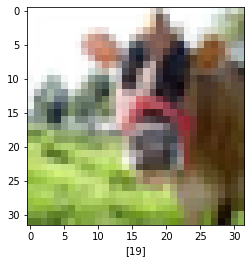

In [ ]:
plt.imshow(X_train[0])
plt.xlabel(y_train[0])

In [ ]:
# for i in range(0,50000):
#     X_train[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2HSV)
#     #y_train[i] = cv2.cvtColor(y_train[i], cv2.COLOR_BGR2HSV)

# for j in range(0,10000):
#     X_test[j] = cv2.cvtColor(X_test[j], cv2.COLOR_BGR2HSV)
#     #y_test[j] = cv2.cvtColor(y_test[j], cv2.COLOR_BGR2HSV)

In [ ]:
x_train = np.zeros(X_train.shape)

In [ ]:
x_train[...,0] = X_train[...,0]/255
x_train[...,1] = X_train[...,1]/255
x_train[...,2] = X_train[...,2]/255

In [ ]:
def tot_encoder():
    encoder_input = Input(shape=(32, 32, 3))
    x = Reshape((32, 32, 1))(encoder_input[..., 0])
    x = Conv2D(20, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    # x = Conv2D(40, (3,3), activation="relu", padding='same')(x)
    # x = MaxPooling2D()(x)
    x = Flatten()(x)
    encoder1_output = Dense(100, activation="relu")(x)

    x = Reshape((32, 32, 1))(encoder_input[..., 1])
    x = Conv2D(20, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    # x = Conv2D(40, (3,3), activation="relu", padding='same')(x)
    # x = MaxPooling2D()(x)
    x = Flatten()(x)
    encoder2_output = Dense(100, activation="relu")(x)

    x = Reshape((32, 32, 1))(encoder_input[..., 2])
    x = Conv2D(20, (3,3), activation="relu", padding='same')(x)
    x = MaxPooling2D()(x)
    # x = Conv2D(40, (3,3), activation="relu", padding='same')(x)
    # x = MaxPooling2D()(x)
    x = Flatten()(x)
    encoder3_output = Dense(100, activation="relu")(x)

    junc = Concatenate()([encoder1_output, encoder2_output, encoder3_output])
    return Model(encoder_input, Flatten()(junc), name="tot_encoder")

Model: "tot_encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_2 (Te [(None, 32, 32)]     0           input_1[0][0]                    
________________________________________________________________________________________

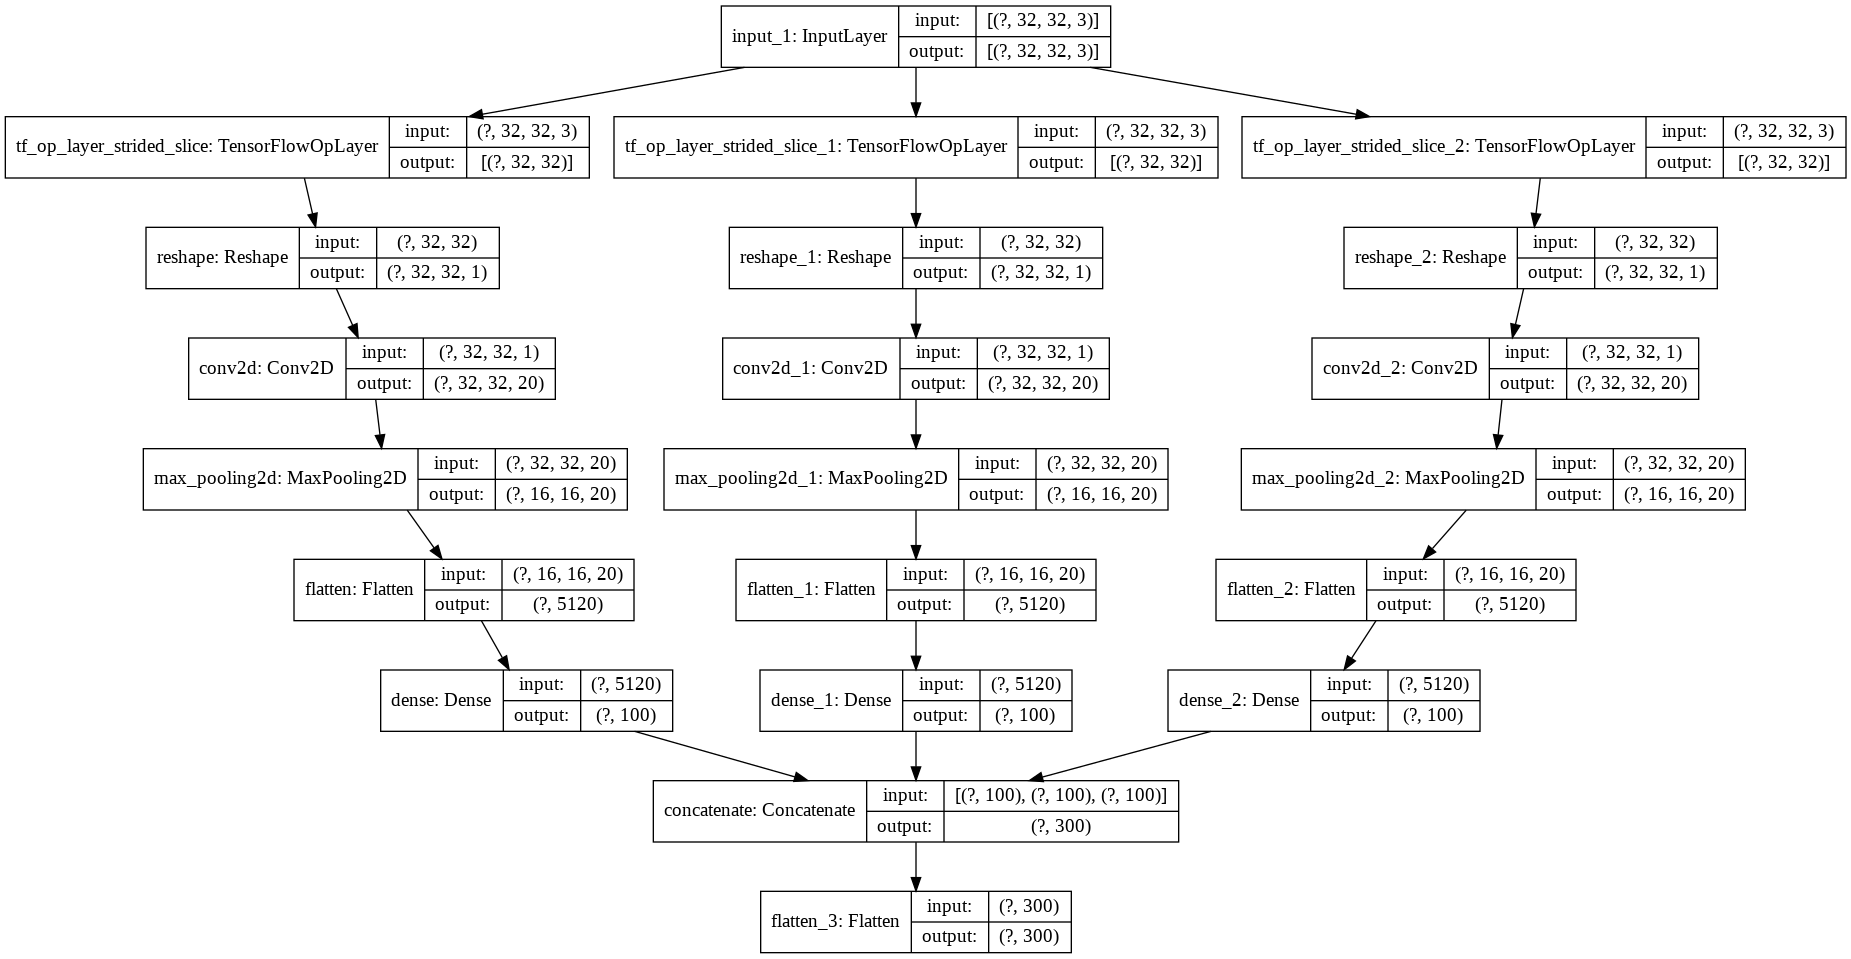

In [ ]:
tot_encoder = tot_encoder()
tot_encoder.summary()
plot_model(tot_encoder,to_file="tot_encoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [ ]:
def decoder():
  decoder_input1 = Input(shape=(3*100,))
  x = Dense(8*8*32)(decoder_input1)
  x = Reshape((8, 8, 32))(x)
  x = UpSampling2D()(x)
  x = Conv2DTranspose(40, (3,3), activation="relu", padding="same")(x)
  x = UpSampling2D()(x)
  x = Conv2DTranspose(20, (3,3), activation="relu", padding="same")(x)
  decoder_output = Conv2DTranspose(3, 3, activation="sigmoid", padding='same')(x)
  return Model(decoder_input1, decoder_output, name="decoder")

In [ ]:
# encoder1 = encoder1()
# encoder1.summary()

In [ ]:
# encoder2 = encoder2()
# encoder2.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              616448    
_________________________________________________________________
reshape_3 (Reshape)          (None, 8, 8, 32)          0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 40)        11560     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 32, 32, 40)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 20)        7220

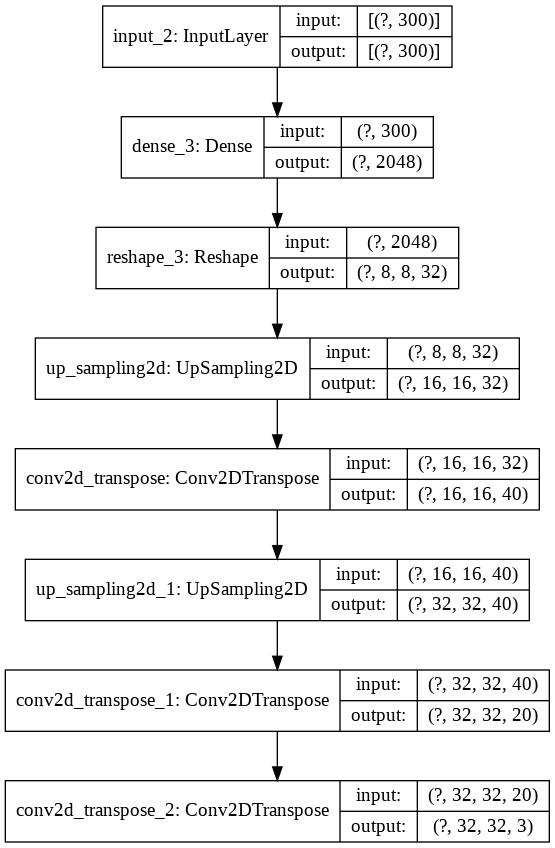

In [ ]:
decoder = decoder()
decoder.summary()
plot_model(decoder,to_file="decoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [ ]:
# junction = junction()
# encoder = Model([encoder1.input, encoder2.input], junction([encoder1.output, encoder2.output]))
# encoder.summary()
# plot_model(encoder,to_file="encoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

Model: "autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 32, 32)]     0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_2 (Te [(None, 32, 32)]     0           input_1[0][0]                    
________________________________________________________________________________________

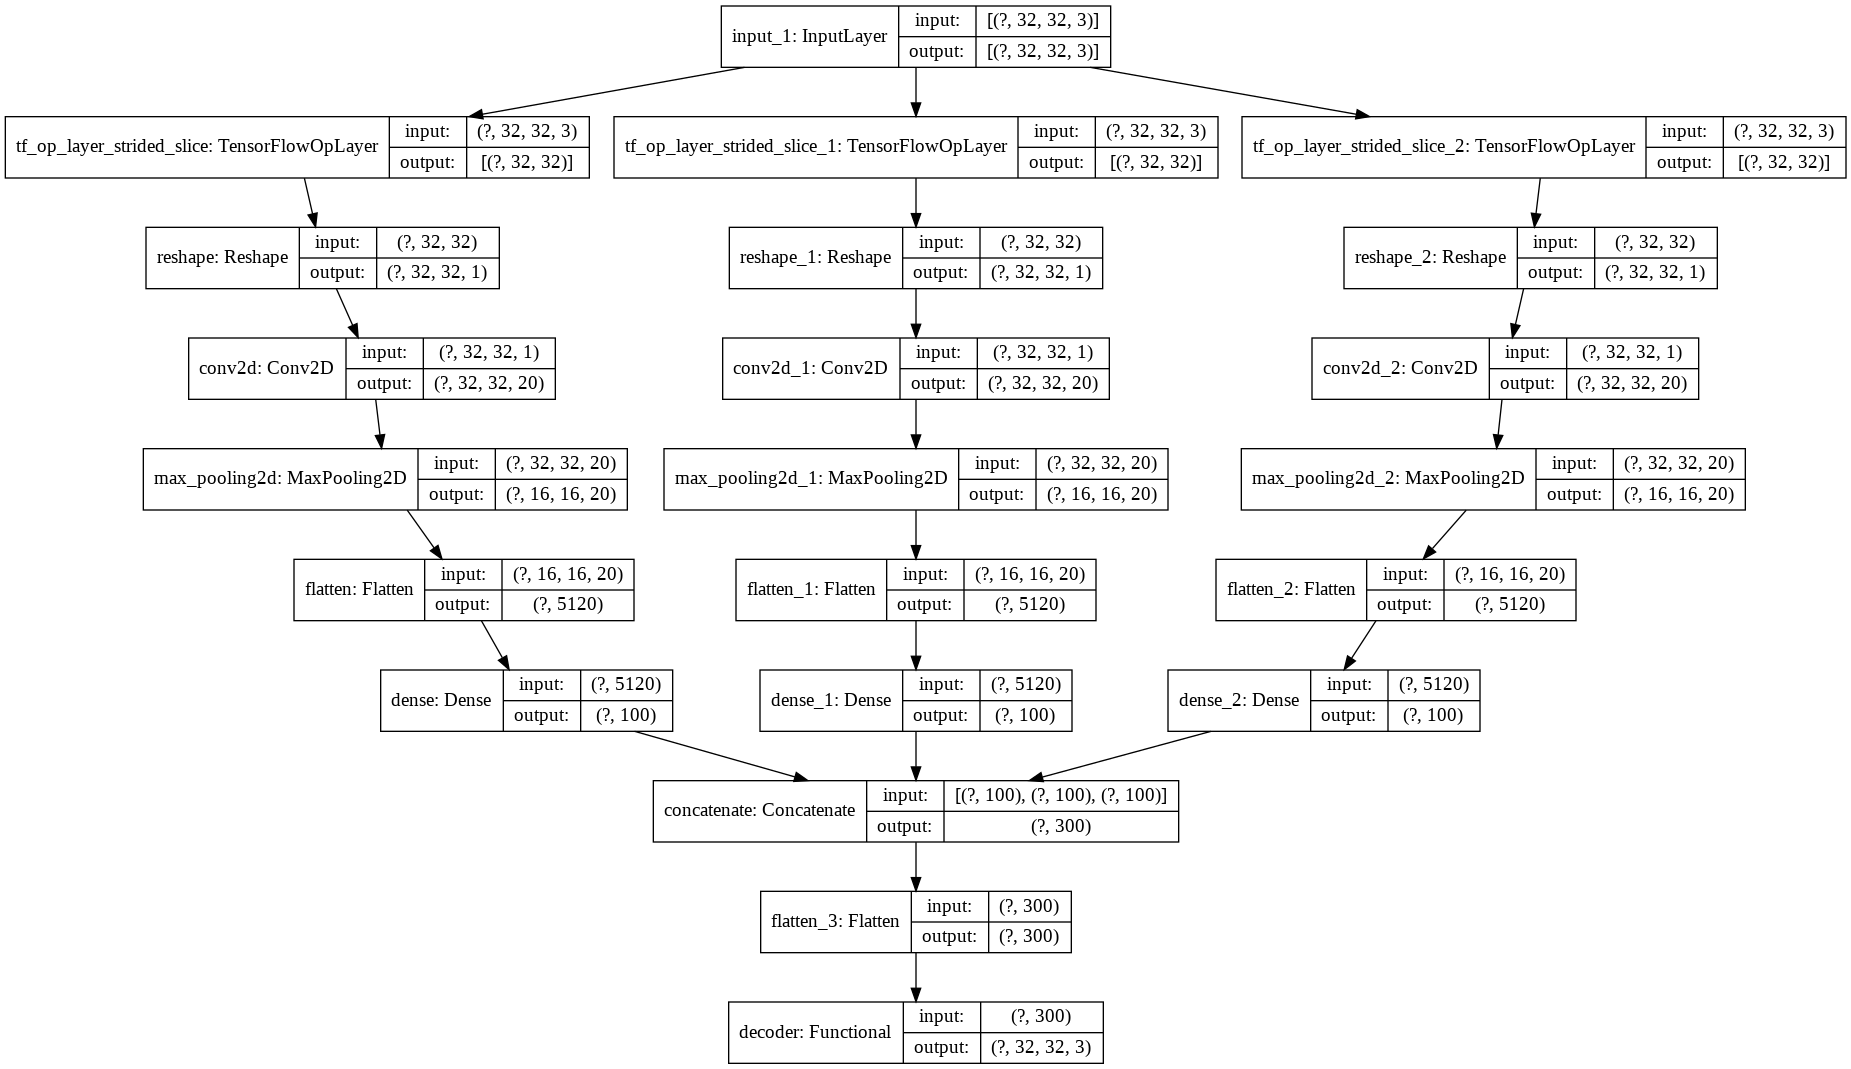

In [ ]:
autoencoder = Model(tot_encoder.input, decoder(tot_encoder.output), name="autoencoder")
autoencoder.summary()
plot_model(autoencoder,to_file="autoencoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [ ]:
# autoencoder.compile(loss = 'mae', optimizer = "Adam", metrics=["accuracy"])

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.0005)
autoencoder.compile(loss = 'mae', optimizer = opt, metrics=["accuracy"]) 

In [ ]:
# autoencoder.fit(X_train, X_train, epochs = 1, batch_size = 32)
history = autoencoder.fit(x_train, x_train, epochs = 15, batch_size = 64)

Epoch 1/15
782/782 [==============================] - 6s 8ms/step - loss: 0.0944 - accuracy: 0.6408
Epoch 2/15
782/782 [==============================] - 6s 8ms/step - loss: 0.0677 - accuracy: 0.7253
Epoch 3/15
782/782 [==============================] - 6s 8ms/step - loss: 0.0619 - accuracy: 0.7440
Epoch 4/15
782/782 [==============================] - 6s 8ms/step - loss: 0.0587 - accuracy: 0.7547
Epoch 5/15
782/782 [==============================] - 6s 8ms/step - loss: 0.0565 - accuracy: 0.7616
Epoch 6/15
782/782 [==============================] - 6s 8ms/step - loss: 0.0550 - accuracy: 0.7664
Epoch 7/15
782/782 [==============================] - 6s 8ms/step - loss: 0.0537 - accuracy: 0.7686
Epoch 8/15
782/782 [==============================] - 6s 8ms/step - loss: 0.0527 - accuracy: 0.7698
Epoch 9/15
782/782 [==============================] - 6s 8ms/step - loss: 0.0520 - accuracy: 0.7718
Epoch 10/15
782/782 [==============================] - 6s 8ms/step - loss: 0.0514 - accuracy: 0.7724

In [ ]:
def ncoder():
  ncoder_input = Input(shape=(32, 32, 3))
  x = Conv2D(20, (3,3), activation="relu", padding='same')(ncoder_input)
  x = MaxPooling2D()(x)
  x = Flatten()(x)
  ncoder_output = Dense(300, activation="relu")(x)
  return Model(ncoder_input,ncoder_output, name="ncoder")

Model: "ncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5120)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               1536300   
Total params: 1,536,860
Trainable params: 1,536,860
Non-trainable params: 0
_________________________________________________________________


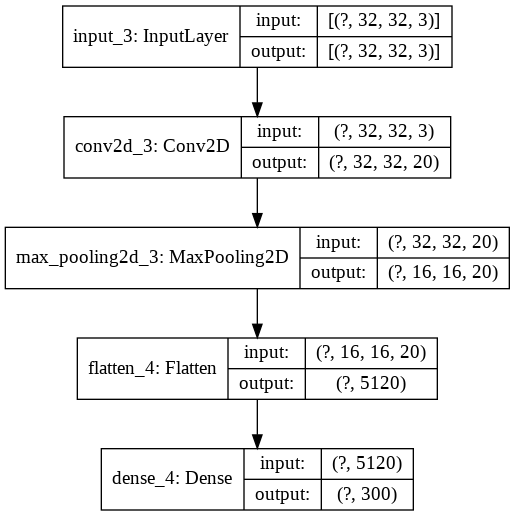

In [ ]:
ncoder = ncoder()
ncoder.summary()
plot_model(ncoder,to_file="ncoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [ ]:
def dcoder():
  dcoder_input = Input(shape=(3*100,))
  x = Dense(8*8*32)(dcoder_input)
  x = Reshape((8, 8, 32))(x)
  x = UpSampling2D()(x)
  x = Conv2DTranspose(40, (3,3), activation="relu", padding="same")(x)
  x = UpSampling2D()(x)
  x = Conv2DTranspose(20, (3,3), activation="relu", padding="same")(x)
  dcoder_output = Conv2DTranspose(3, 3, activation="sigmoid", padding='same')(x)
  return Model(dcoder_input, dcoder_output, name="dcoder")

Model: "dcoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              616448    
_________________________________________________________________
reshape_4 (Reshape)          (None, 8, 8, 32)          0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 16, 16, 40)        11560     
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 32, 32, 40)        0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 32, 32, 20)        7220 

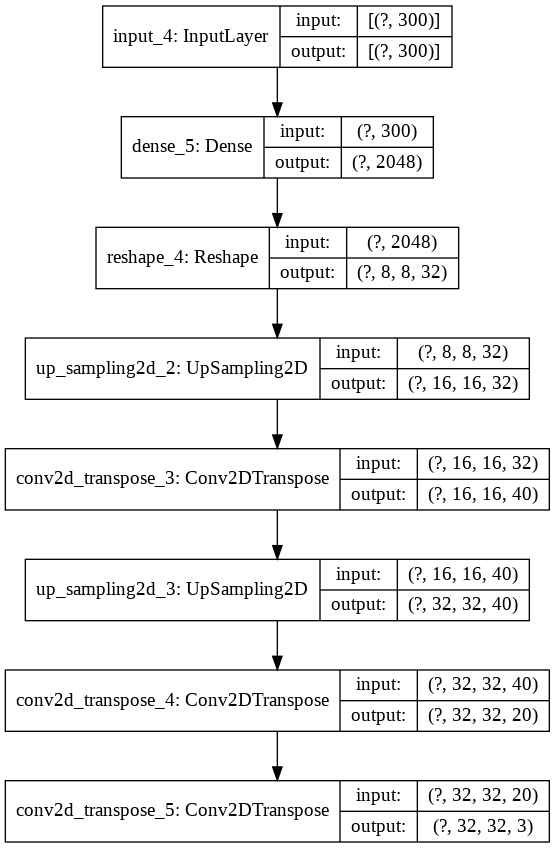

In [ ]:
dcoder = dcoder()
dcoder.summary()
plot_model(dcoder,to_file="dcoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

Model: "autoncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5120)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               1536300   
_________________________________________________________________
dcoder (Functional)          (None, 32, 32, 3)         635771    
Total params: 2,172,631
Trainable params: 2,172,631
Non-trainable params: 0
______________________________________________

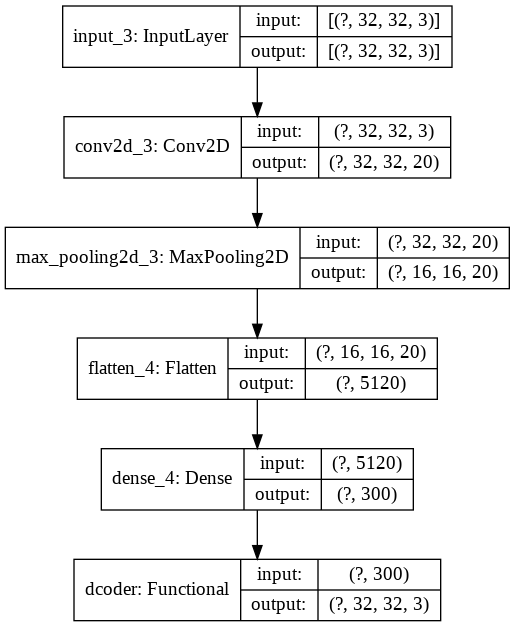

In [ ]:
autoncoder = Model(ncoder.input, dcoder(ncoder.output), name="autoncoder")
autoncoder.summary()
plot_model(autoncoder,to_file="autoncoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")

In [ ]:
opt1 = tf.optimizers.Adam(learning_rate=0.0005)
autoncoder.compile(loss = 'mae', optimizer = opt1, metrics=["accuracy"]) 

In [ ]:
histry = autoncoder.fit(x_train, x_train, epochs = 15, batch_size = 64)

Epoch 1/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0928 - accuracy: 0.6622
Epoch 2/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0652 - accuracy: 0.7355
Epoch 3/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0596 - accuracy: 0.7487
Epoch 4/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0561 - accuracy: 0.7566
Epoch 5/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0539 - accuracy: 0.7628
Epoch 6/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0521 - accuracy: 0.7693
Epoch 7/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0509 - accuracy: 0.7734
Epoch 8/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0499 - accuracy: 0.7759
Epoch 9/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0492 - accuracy: 0.7774
Epoch 10/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0483 - accuracy: 0.7782

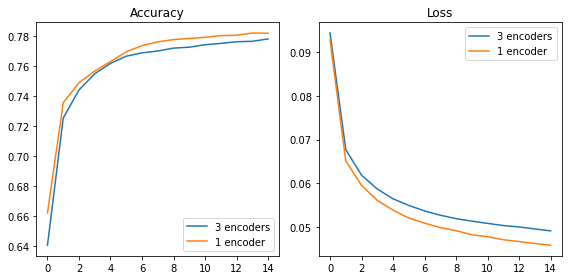

In [ ]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.plot(history.history['accuracy'], label="3 encoders")
ax1.plot(histry.history['accuracy'], label="1 encoder")
ax1.legend()
ax1.set_title("Accuracy")
ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'], label="3 encoders")
ax2.plot(histry.history['loss'], label="1 encoder")
ax2.legend()
ax2.set_title("Loss")
plt.tight_layout()
# plt.savefig("resources/relu.png", dpi=300)
plt.show()

In [ ]:
image1 =  autoncoder.predict(x_train[50].reshape(1,32,32,3))
image1 = image1.reshape(32,32,3)

In [ ]:
image =  autoencoder.predict(x_train[50].reshape(1,32,32,3))
image = image.reshape(32,32,3)

<Figure size 432x288 with 0 Axes>

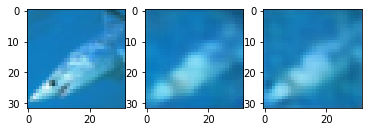

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,3) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(x_train[50], label = 'image')
axarr[1].imshow(image, label = '3 encoders')
# axarr[2].imshow(x_train[5])
axarr[2].imshow(image1, label = '1 encoder')

In [ ]:
# encoder = encoder()
# encoder.summary()
# plot_model(encoder,to_file="encoder.png", show_shapes=True, show_layer_names=True, rankdir="TB")